In [211]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [236]:
Cholesterol_file_p = '/data/data1/diabetes/EMR-data2/Cholesterol.csv'
BP_file_p = '/data/data1/diabetes/EMR-data2/BP.csv'
gulcose_p = '/data/data1/diabetes/EMR-data2/Glucose.csv'
FamilyHist_file_p = '/data/data1/diabetes/EMR-data1/FamilyHist.csv'
OralGlucose_file_p = '/data/data1/diabetes/EMR-data1/OralGlucose.csv'
PatPopulation_file_p = '/data/data1/diabetes/EMR-data1/PatPopulation.csv'
Vitals_file_p = '/data/data1/diabetes/EMR-data1/Vitals.csv'
genome_header = '/data/data1/diabetes/header.txt'
output = '/data/data1/diabetes/EMR-data2/diabetes_feature1.csv'

In [237]:
Cholesterol_pd = pd.read_csv(Cholesterol_file_p, sep=',')
BP_pd = pd.read_csv(BP_file_p, sep=',')
gulcose_pd = pd.read_csv(gulcose_p, sep=',')
FamilyHist_pd = pd.read_csv(FamilyHist_file_p, sep=',')
OralGlucose_pd = pd.read_csv(OralGlucose_file_p, sep=',')
PatPopulation_pd = pd.read_csv(PatPopulation_file_p, sep=',')
Vitals_pd = pd.read_csv(Vitals_file_p, sep=',')



In [238]:
gulcose_pd.head()

,Deidentified_Pat_ID,gulcose,Fasting?
0,MGVNDNAK,94.0,NaN
1,MNAAOKVG,101.0,NaN
2,MNADDANN,122.0,NaN
3,MNADOVKN,137.0,NaN
4,MNADZOHA,104.0,Yes


In [239]:
def read_header(ps_folder):
    data_arr = []

    with open(ps_folder, 'r') as f:

        lines = f.readlines()

        for line in lines:

            if line != '\n':
                items = line.split(sep='\t')
                data_arr.extend(items)
            else:
                break

    print("--------------------------------")

    return data_arr

In [240]:
#genome_header_pd = pd.read_csv(genome_header, sep='\t', header=None)
head_list = read_header(genome_header)
head_pd = pd.DataFrame(head_list)


--------------------------------


In [241]:
head_pd.head()

,0
0,MGVKKNZN
1,MNADOVKN
2,MNAODHZZ
3,MNAOGDAK
4,MNATONVG


In [242]:
Cholesterol_pd.shape,BP_pd.shape,FamilyHist_pd.shape,OralGlucose_pd.shape,PatPopulation_pd.shape,Vitals_pd.shape

((5532, 5), (6157, 5), (3222, 3), (140, 6), (6212, 5), (6157, 5))

In [243]:
len(pd.Series(Cholesterol_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5532

In [244]:
len(pd.Series(BP_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6157

In [245]:
len(pd.Series(gulcose_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5693

In [246]:
len(gulcose_pd)

5693

In [247]:
len(pd.Series(FamilyHist_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

3222

In [248]:
len(pd.Series(OralGlucose_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

123

In [249]:
len(pd.Series(PatPopulation_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6212

In [250]:
len(pd.Series(Vitals_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6157

In [251]:

res = pd.merge(Vitals_pd,PatPopulation_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,WeightYear,Weight,Height,BMI,gender,age,ethnicity,race
0,MGVKKNZN,2018.0,2320.0,23.41,66.0,0,60,3,7
1,MGVNDNAK,2019.0,2896.0,23.89,73.0,0,51,3,7
2,MNAAOKVG,2019.0,2619.2,NaN,NaN,0,43,3,6
3,MNADDANN,2019.0,2737.6,NaN,NaN,0,39,3,6
4,MNADOVKN,2019.0,2825.6,NaN,NaN,0,46,3,7


In [252]:
res = pd.merge(Vitals_pd,PatPopulation_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,WeightYear,Weight,Height,BMI,gender,age,ethnicity,race
0,MGVKKNZN,2018.0,2320.0,23.41,66.0,0,60,3,7
1,MGVNDNAK,2019.0,2896.0,23.89,73.0,0,51,3,7
2,MNAAOKVG,2019.0,2619.2,NaN,NaN,0,43,3,6
3,MNADDANN,2019.0,2737.6,NaN,NaN,0,39,3,6
4,MNADOVKN,2019.0,2825.6,NaN,NaN,0,46,3,7


In [253]:
FamilyHist_pd.head()

,Deidentified_Pat_ID,result,type
0,MGVNDNAK,Diabetes,3
1,MNADDANN,Diabetes Type 1,1
2,MNADZOHA,Diabetes,3
3,MNANKNAN,Diabetes Type 2,2
4,MNATONVG,Diabetes,3


In [254]:
FamilyHist_pd = FamilyHist_pd[['Deidentified_Pat_ID','type']]
FamilyHist_pd.columns = ['Deidentified_Pat_ID','family_diabetes_type']
res = pd.merge(res,FamilyHist_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,WeightYear,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type
0,MGVKKNZN,2018.0,2320.0,23.41,66.0,0,60,3,7,NaN
1,MGVNDNAK,2019.0,2896.0,23.89,73.0,0,51,3,7,3.0
2,MNAAOKVG,2019.0,2619.2,NaN,NaN,0,43,3,6,NaN
3,MNADDANN,2019.0,2737.6,NaN,NaN,0,39,3,6,1.0
4,MNADOVKN,2019.0,2825.6,NaN,NaN,0,46,3,7,NaN


In [255]:
BP_pd.head()

,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
0,MGVKKNZN,120/78,2018,120,78
1,MGVNDNAK,102/66,2019,102,66
2,MNAAOKVG,136/80,2017,136,80
3,MNADDANN,134/98,2017,134,98
4,MNADOVKN,139/95,2016,139,95


In [256]:
BP_pd = BP_pd[['Deidentified_Pat_ID','bp_high', 'bp_low']]

res = pd.merge(res,BP_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,WeightYear,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low
0,MGVKKNZN,2018.0,2320.0,23.41,66.0,0,60,3,7,NaN,120.0,78.0
1,MGVNDNAK,2019.0,2896.0,23.89,73.0,0,51,3,7,3.0,102.0,66.0
2,MNAAOKVG,2019.0,2619.2,NaN,NaN,0,43,3,6,NaN,136.0,80.0
3,MNADDANN,2019.0,2737.6,NaN,NaN,0,39,3,6,1.0,134.0,98.0
4,MNADOVKN,2019.0,2825.6,NaN,NaN,0,46,3,7,NaN,139.0,95.0


In [257]:
Cholesterol_pd.head()

,Deidentified_Pat_ID,triglyceride,ldl,hdl,a1c
0,ZNODZHKT,20.0,109.0,74.0,NaN
1,ZHOHTGGV,23.0,19.0,33.0,5.7
2,ZDVZZVDT,24.0,123.0,75.0,NaN
3,ZDHVKTZT,26.0,85.0,65.0,NaN
4,ZDNVNAN,26.0,59.0,51.0,NaN


In [258]:
res = pd.merge(res,Cholesterol_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()


,Deidentified_Pat_ID,WeightYear,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c
0,MGVKKNZN,2018.0,2320.0,23.41,66.0,0,60,3,7,NaN,120.0,78.0,NaN,NaN,NaN,NaN
1,MGVNDNAK,2019.0,2896.0,23.89,73.0,0,51,3,7,3.0,102.0,66.0,78.0,119.0,69.0,5.3
2,MNAAOKVG,2019.0,2619.2,NaN,NaN,0,43,3,6,NaN,136.0,80.0,85.0,112.0,47.0,NaN
3,MNADDANN,2019.0,2737.6,NaN,NaN,0,39,3,6,1.0,134.0,98.0,261.0,30.0,40.0,9.1
4,MNADOVKN,2019.0,2825.6,NaN,NaN,0,46,3,7,NaN,139.0,95.0,85.0,178.0,70.0,5.3


In [259]:
res = pd.merge(res,gulcose_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,WeightYear,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c,gulcose,Fasting?
0,MGVKKNZN,2018.0,2320.0,23.41,66.0,0,60,3,7,NaN,120.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN
1,MGVNDNAK,2019.0,2896.0,23.89,73.0,0,51,3,7,3.0,102.0,66.0,78.0,119.0,69.0,5.3,94.0,NaN
2,MNAAOKVG,2019.0,2619.2,NaN,NaN,0,43,3,6,NaN,136.0,80.0,85.0,112.0,47.0,NaN,101.0,NaN
3,MNADDANN,2019.0,2737.6,NaN,NaN,0,39,3,6,1.0,134.0,98.0,261.0,30.0,40.0,9.1,122.0,NaN
4,MNADOVKN,2019.0,2825.6,NaN,NaN,0,46,3,7,NaN,139.0,95.0,85.0,178.0,70.0,5.3,137.0,NaN


In [260]:
res.describe()

,WeightYear,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c,gulcose
count,5654.000000,5637.000000,2415.000000,2911.000000,6212.000000,6212.000000,6212.000000,6212.000000,3222.000000,6157.000000,6157.000000,5468.000000,5373.000000,5466.000000,2287.000000,5693.000000
mean,2018.736823,3093.069172,29.680232,67.015456,0.607051,54.553928,2.956375,6.970863,2.941030,144.323372,82.390287,166.619422,122.790955,58.540505,6.367381,117.705270
std,0.529744,754.294527,6.230362,3.742598,0.488445,15.343955,0.357359,0.551009,0.266519,19.612106,11.606942,155.916396,35.991479,17.718897,1.547652,33.343363
min,2014.000000,1318.400000,14.620000,57.000000,0.000000,18.000000,-1.000000,-1.000000,1.000000,90.000000,8.000000,20.000000,10.000000,15.000000,3.700000,55.000000
25%,2019.000000,2547.200000,25.325000,64.016000,0.000000,42.000000,3.000000,7.000000,3.000000,131.000000,74.000000,93.000000,97.000000,46.000000,5.400000,98.000000
50%,2019.000000,3008.000000,28.780000,66.750000,1.000000,56.000000,3.000000,7.000000,3.000000,140.000000,82.000000,138.000000,120.000000,56.000000,5.800000,106.000000
75%,2019.000000,3539.200000,33.050000,69.665500,1.000000,67.000000,3.000000,7.000000,3.000000,156.000000,90.000000,199.000000,144.000000,68.000000,6.700000,124.000000
max,2019.000000,8048.000000,65.730000,79.500000,1.000000,90.000000,3.000000,13.000000,4.000000,430.000000,148.000000,6163.000000,370.000000,166.000000,16.000000,249.000000


In [261]:
len(res[res['gulcose'].isna()])

519

In [68]:
len(pd.Series(Cholesterol_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5532

In [85]:
len(res), len(head_pd)

(6212, 3910)

In [87]:
head_pd.columns = ['Deidentified_Pat_ID']

In [88]:
head_pd.head()

,Deidentified_Pat_ID
0,MGVKKNZN
1,MNADOVKN
2,MNAODHZZ
3,MNAOGDAK
4,MNATONVG


In [91]:
res = pd.merge(res,head_pd, how='right',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,WeightYear,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c
0,MGVKKNZN,2018.0,2320.0,23.41,66.000,0.0,60.0,3.0,7.0,NaN,120.0,78.0,NaN,NaN,NaN,NaN
1,MNADOVKN,2019.0,2825.6,NaN,NaN,0.0,46.0,3.0,7.0,NaN,139.0,95.0,85.0,178.0,70.0,5.3
2,MNAODHZZ,2019.0,7331.2,NaN,NaN,0.0,61.0,3.0,7.0,NaN,168.0,93.0,79.0,93.0,39.0,NaN
3,MNAOGDAK,2019.0,3376.0,29.44,70.984,0.0,41.0,3.0,7.0,NaN,156.0,104.0,111.0,123.0,35.0,NaN
4,MNATONVG,2019.0,3072.0,NaN,NaN,1.0,29.0,3.0,7.0,3.0,130.0,74.0,166.0,82.0,40.0,NaN


In [92]:
len(res)

3910

In [98]:
res.describe()

,WeightYear,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c
count,3567.000000,3559.000000,1529.000000,1830.000000,3880.000000,3880.000000,3880.000000,3880.000000,2017.000000,3880.000000,3880.000000,3497.000000,3438.000000,3495.000000,1452.000000
mean,2018.709840,3085.394799,29.455533,66.960990,0.599742,55.437113,2.959278,6.983763,2.948438,144.603351,82.412113,165.432085,122.217219,58.620429,6.405510
std,0.547437,747.200999,5.909634,3.784445,0.490014,15.229622,0.346442,0.503654,0.248645,19.703307,11.673902,135.884462,35.521104,17.493258,1.552943
min,2014.000000,1436.800000,17.230000,57.000000,0.000000,19.000000,-1.000000,1.000000,1.000000,90.000000,8.000000,23.000000,10.000000,15.000000,3.700000
25%,2018.000000,2551.200000,25.270000,64.000000,0.000000,43.000000,3.000000,7.000000,3.000000,132.000000,74.000000,94.000000,97.000000,46.000000,5.400000
50%,2019.000000,3008.000000,28.660000,66.535000,1.000000,57.000000,3.000000,7.000000,3.000000,140.000000,82.000000,138.000000,120.000000,56.000000,5.800000
75%,2019.000000,3520.800000,32.630000,69.500000,1.000000,68.000000,3.000000,7.000000,3.000000,156.000000,89.000000,198.000000,144.000000,69.000000,6.825000
max,2019.000000,8048.000000,65.730000,79.000000,1.000000,90.000000,3.000000,13.000000,4.000000,430.000000,148.000000,2776.000000,370.000000,166.000000,16.000000


In [99]:
len(res[res['a1c']>5.7])

796

In [105]:
len(res[res['a1c']<=5.7])

656

In [100]:
len(res[res['a1c'].notna()])

1452

In [106]:
# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(res)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('a1c', 62.58),
 ('Height', 60.59),
 ('BMI', 52.84),
 ('family_diabetes_type', 48.02),
 ('ldl', 11.39),
 ('hdl', 9.92),
 ('triglyceride', 9.87),
 ('Weight', 8.27),
 ('WeightYear', 8.07),
 ('Deidentified_Pat_ID', 0.0)]

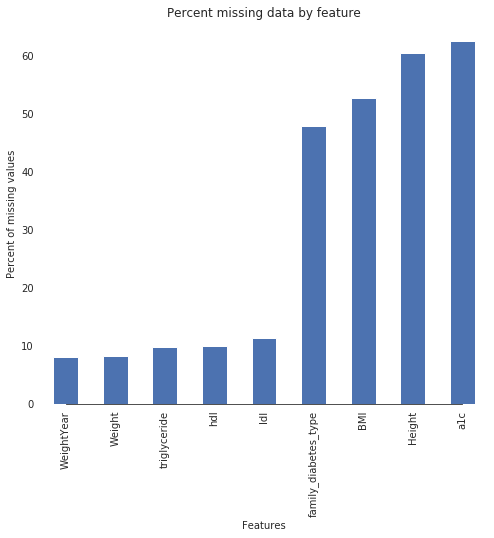

In [108]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(res.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

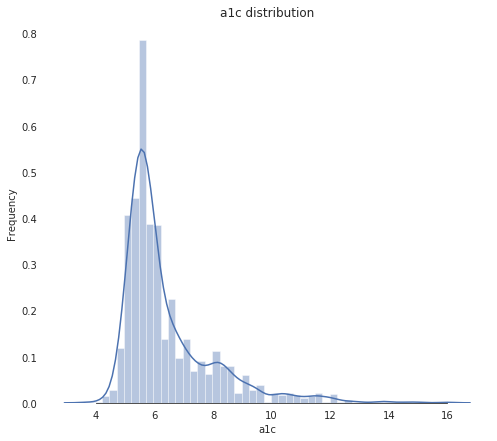

In [116]:
feature_name = 'a1c'
res_bp = res[res[feature_name].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp[feature_name], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=feature_name)
ax.set(title=feature_name+ " distribution")
sns.despine(trim=True, left=True)
plt.show()

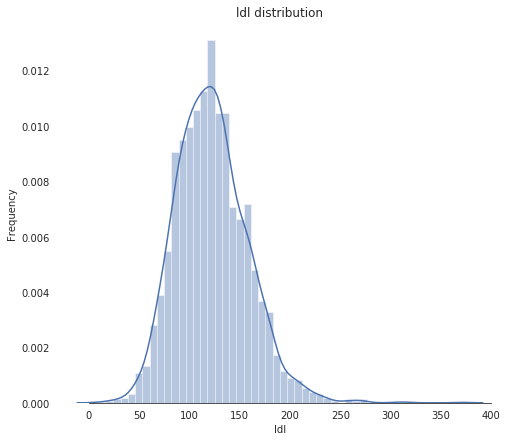

In [117]:
feature_name = 'ldl'
res_bp = res[res[feature_name].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp[feature_name], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=feature_name)
ax.set(title=feature_name+ " distribution")
sns.despine(trim=True, left=True)
plt.show()

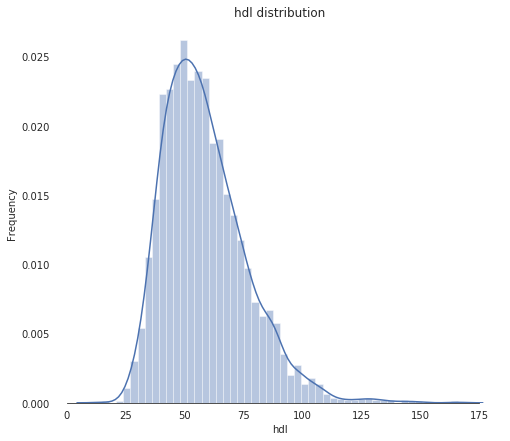

In [118]:
feature_name = 'hdl'
res_bp = res[res[feature_name].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp[feature_name], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=feature_name)
ax.set(title=feature_name+ " distribution")
sns.despine(trim=True, left=True)
plt.show()

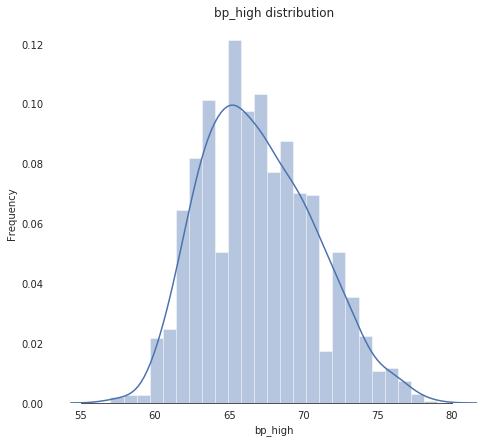

In [115]:
res_bp = res[res['BMI'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp['BMI'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI")
ax.set(title="BMI distribution")
sns.despine(trim=True, left=True)
plt.show()

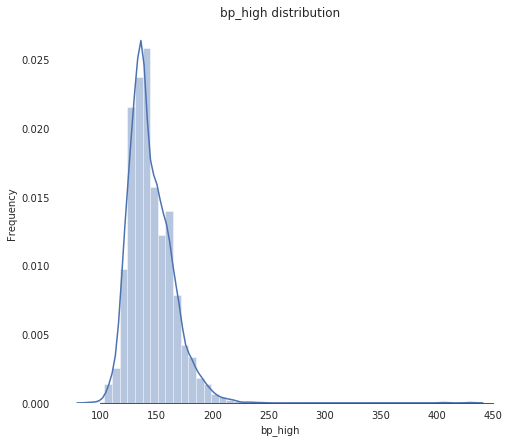

In [112]:
res_bp = res[res['bp_high'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp['bp_high'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_high")
ax.set(title="bp_high distribution")
sns.despine(trim=True, left=True)
plt.show()

In [ ]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in res.columns:
    if res[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(res[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [102]:
res.to_csv(output, index=False)